<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1">Libraries</a></span></li><li><span><a href="#Maps" data-toc-modified-id="Maps-2">Maps</a></span></li><li><span><a href="#Food-Access" data-toc-modified-id="Food-Access-3">Food Access</a></span></li><li><span><a href="#Unemployment" data-toc-modified-id="Unemployment-4">Unemployment</a></span></li><li><span><a href="#Internet-Access" data-toc-modified-id="Internet-Access-5">Internet Access</a></span></li></ul></div>

## Libraries

In [1]:
### UNCOMMENT to install
# !conda install geopandas 

In [34]:
import random
random.seed(12345)
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# %cd "C:\Users\apple\OneDrive\Documents\Harvard College\Senior Year\HCDAG\Preliminary Plots\St. Louis"

## Maps
See: https://geopandas.org/mapping.html

In [3]:
stl_filename = 'BND_Nhd88_cw.shp'
stl_map = gpd.read_file(stl_filename)

In [4]:
stl_map.columns

Index(['NHD_NUM', 'NHD_NAME', 'ANGLE', 'NHD_NUMTXT', 'SHAPE_area', 'SHAPE_len',
       'geometry'],
      dtype='object')

In [5]:
stl_map.head()

,NHD_NUM,NHD_NAME,ANGLE,NHD_NUMTXT,SHAPE_area,SHAPE_len,geometry
0,43,Franz Park,0.0,43 Franz Park,1.101201e+07,14740.430494,"POLYGON ((877657.980 1016328.400, 877790.310 1..."
1,29,Tiffany,0.0,29 Tiffany,5.887342e+06,10467.846527,"POLYGON ((895417.850 1016887.240, 894894.990 1..."
2,28,Botanical Heights,0.0,28 Botanical Heights,1.158601e+07,14700.023102,"POLYGON ((893871.830 1017297.510, 893519.400 1..."
3,40,Kings Oak,0.0,40 Kings Oak,4.706723e+06,9239.956194,"POLYGON ((887474.710 1017871.670, 887462.870 1..."
4,41,Cheltenham,0.0,41 Cheltenham,9.245751e+06,12357.105835,"POLYGON ((884617.940 1018220.450, 884356.350 1..."


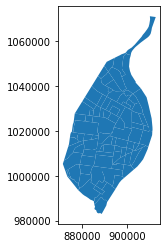

In [6]:
stl_map.plot();

In [7]:
stl_map.plot??

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'BND_Nhd88_cw.cpg',
 'BND_Nhd88_cw.dbf',
 'BND_Nhd88_cw.prj',
 'BND_Nhd88_cw.sbn',
 'BND_Nhd88_cw.sbx',
 'BND_Nhd88_cw.shp',
 'BND_Nhd88_cw.shp.xml',
 'BND_Nhd88_cw.shx',
 'prelim_plots_stl-Gerald.ipynb',
 'prelim_plots_stl.ipynb',
 'README.md',
 'tl_2017_29189_faces.cpg',
 'tl_2017_29189_faces.dbf',
 'tl_2017_29189_faces.prj',
 'tl_2017_29189_faces.shp',
 'tl_2017_29189_faces.shp.ea.iso.xml',
 'tl_2017_29189_faces.shp.iso.xml',
 'tl_2017_29189_faces.shp.xml',
 'tl_2017_29189_faces.shx',
 'tl_2017_29_tract.cpg',
 'tl_2017_29_tract.dbf',
 'tl_2017_29_tract.prj',
 'tl_2017_29_tract.shp',
 'tl_2017_29_tract.shp.ea.iso.xml',
 'tl_2017_29_tract.shp.iso.xml',
 'tl_2017_29_tract.shp.xml',
 'tl_2017_29_tract.shx']

In [16]:
mo_map = gpd.read_file('tl_2017_29_tract.shp')

In [15]:
mo_map.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,29,055,450302,29055450302,4503.02,Census Tract 4503.02,G5020,S,59013759,60638,+38.0699995,-091.3834407,"POLYGON ((-91.42897 38.05010, -91.42867 38.050..."
1,29,055,450102,29055450102,4501.02,Census Tract 4501.02,G5020,S,215515343,158937,+38.1505661,-091.1929142,"POLYGON ((-91.31192 38.15072, -91.31192 38.150..."
2,29,055,450200,29055450200,4502,Census Tract 4502,G5020,S,785265621,714683,+37.9120761,-091.2086380,"POLYGON ((-91.36840 38.09352, -91.36820 38.093..."
3,29,055,450400,29055450400,4504,Census Tract 4504,G5020,S,518540938,475755,+37.8958126,-091.3892206,"POLYGON ((-91.52872 37.79422, -91.52861 37.801..."
4,29,221,460100,29221460100,4601,Census Tract 4601,G5020,S,326340249,1749597,+38.0601610,-090.7464572,"POLYGON ((-90.84523 38.04041, -90.84517 38.041..."


In [ ]:
mo_map.plot()

## COVID cases and deaths

Data source options:
+ [NYTimes](https://github.com/nytimes/covid-19-data) = county-level

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [13]:
from datetime import date, timedelta

yest = date.today()- timedelta(days = 1) 

# dd/mm/YY
yest = yest.strftime('%Y-%m-%d')

In [17]:
mo_covid = df[(df.state=='Missouri') & (df.date==yest)]
mo_covid.head()

,date,county,state,fips,cases,deaths
82716,2020-04-23,Adair,Missouri,29001.0,12,0
82717,2020-04-23,Andrew,Missouri,29003.0,1,0
82718,2020-04-23,Atchison,Missouri,29005.0,2,0
82719,2020-04-23,Audrain,Missouri,29007.0,1,0
82720,2020-04-23,Barry,Missouri,29009.0,5,0


In [28]:
mo_map['fips'] = mo_map['STATEFP'].astype(np.float64)*1000+mo_map['COUNTYFP'].astype(np.float64)  # match NYtimes
mo_map['fips'].head()

0    29055.0
1    29055.0
2    29055.0
3    29055.0
4    29221.0
Name: fips, dtype: float64

In [29]:
mo_merged = pd.merge(mo_map, mo_covid, on='fips')

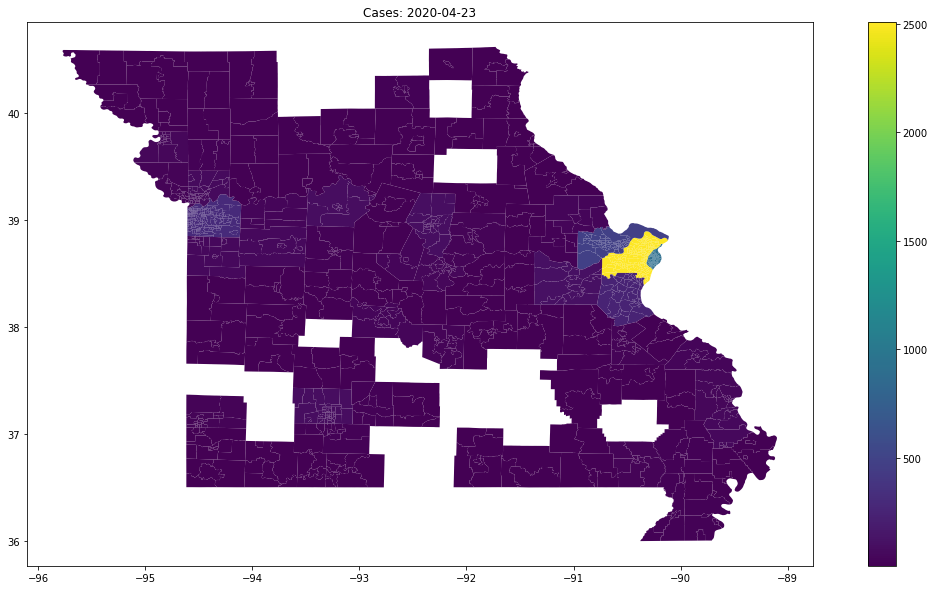

In [48]:
mo_merged.plot(column='cases',legend=True, figsize=(20,10));
plt.title('Cases: '+yest);

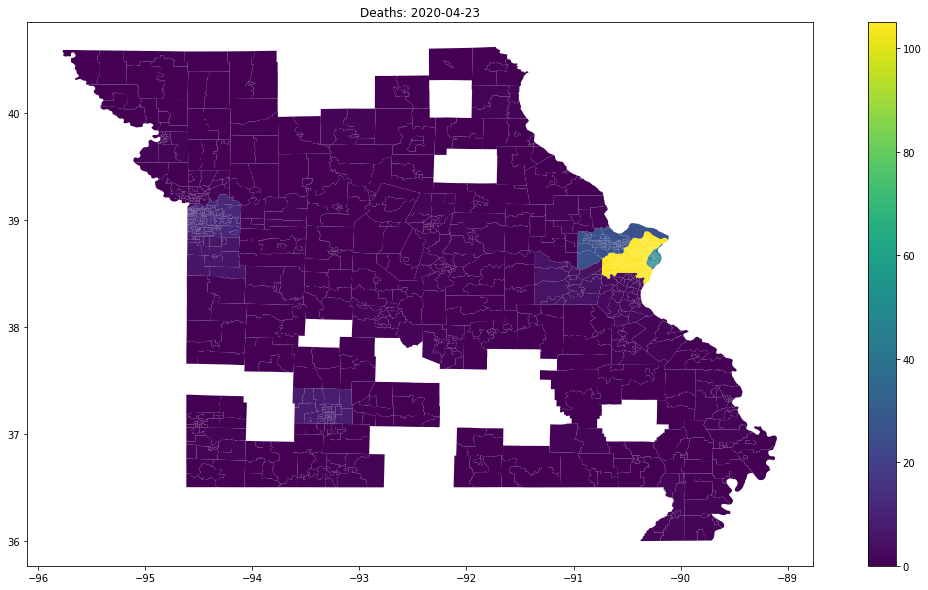

In [47]:
mo_merged.plot(column='deaths',legend=True, figsize=(20,10));
plt.title('Deaths: '+yest);

## Unemployment

## Internet Access